# Codeword Length = 15, T = 7, p(BSC parameter) {0.01, 0.05, 0.1, 0.2}

In [1]:
# changepoint_detection_updated.py
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
print(os.listdir("/kaggle/input/bsc-0-01-15-seq-len"))

['bsc_p0.15_C1_n15_k11.csv', 'bsc_p0.40_codewords1.csv', 'bsc_p0.005_C2_n15_k7.csv', 'bsc_p0.08_C1_n15_k11.csv', 'bsc_p0.20_codewords2.csv', 'bsc_p0.01_codewords1.csv', 'bsc_p0.05_codewords1.csv', 'bsc_p0.01_codewords2.csv', 'bsc_p0.005_C1_n15_k11.csv', 'bsc_p0.001_C2_n15_k7.csv', 'bsc_p0.001_C1_n15_k11.csv', 'bsc_p0.30_codewords1.csv', 'bsc_p0.10_codewords1.csv', 'bsc_p0.20_codewords1.csv', 'bsc_p0.15_C2_n15_k7.csv', 'bsc_p0.10_codewords2.csv', 'bsc_p0.30_codewords2.csv', 'bsc_p0.40_codewords2.csv', 'bsc_p0.05_codewords2.csv', 'bsc_p0.08_C2_n15_k7.csv']


## p = 0.01

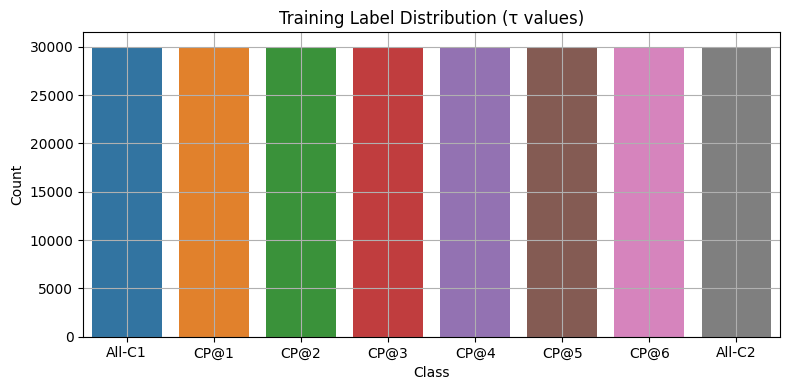

Training Epochs:   2%|▏         | 1/50 [00:20<16:35, 20.32s/it]

Epoch  1 | Train Loss: 2.0809 | Val Accuracy: 0.1517


Training Epochs:   4%|▍         | 2/50 [00:40<16:19, 20.40s/it]

Epoch  2 | Train Loss: 1.5139 | Val Accuracy: 0.5683


Training Epochs:   6%|▌         | 3/50 [01:01<16:00, 20.43s/it]

Epoch  3 | Train Loss: 1.0281 | Val Accuracy: 0.7008


Training Epochs:   8%|▊         | 4/50 [01:21<15:36, 20.37s/it]

Epoch  4 | Train Loss: 0.8218 | Val Accuracy: 0.8112


Training Epochs:  10%|█         | 5/50 [01:41<15:14, 20.31s/it]

Epoch  5 | Train Loss: 0.6479 | Val Accuracy: 0.8759


Training Epochs:  12%|█▏        | 6/50 [02:01<14:52, 20.28s/it]

Epoch  6 | Train Loss: 0.5093 | Val Accuracy: 0.9141


Training Epochs:  14%|█▍        | 7/50 [02:22<14:32, 20.29s/it]

Epoch  7 | Train Loss: 0.4080 | Val Accuracy: 0.9327


Training Epochs:  16%|█▌        | 8/50 [02:42<14:10, 20.25s/it]

Epoch  8 | Train Loss: 0.3430 | Val Accuracy: 0.9442


Training Epochs:  18%|█▊        | 9/50 [03:02<13:50, 20.25s/it]

Epoch  9 | Train Loss: 0.2936 | Val Accuracy: 0.9529


Training Epochs:  20%|██        | 10/50 [03:23<13:32, 20.32s/it]

Epoch 10 | Train Loss: 0.2596 | Val Accuracy: 0.9589


Training Epochs:  22%|██▏       | 11/50 [03:43<13:10, 20.27s/it]

Epoch 11 | Train Loss: 0.2352 | Val Accuracy: 0.9631


Training Epochs:  24%|██▍       | 12/50 [04:03<12:51, 20.30s/it]

Epoch 12 | Train Loss: 0.2144 | Val Accuracy: 0.9656


Training Epochs:  26%|██▌       | 13/50 [04:23<12:29, 20.25s/it]

Epoch 13 | Train Loss: 0.1989 | Val Accuracy: 0.9684


Training Epochs:  28%|██▊       | 14/50 [04:44<12:10, 20.28s/it]

Epoch 14 | Train Loss: 0.1891 | Val Accuracy: 0.9683


Training Epochs:  30%|███       | 15/50 [05:04<11:50, 20.30s/it]

Epoch 15 | Train Loss: 0.1797 | Val Accuracy: 0.9705


Training Epochs:  32%|███▏      | 16/50 [05:24<11:29, 20.28s/it]

Epoch 16 | Train Loss: 0.1717 | Val Accuracy: 0.9720


Training Epochs:  34%|███▍      | 17/50 [05:44<11:08, 20.25s/it]

Epoch 17 | Train Loss: 0.1662 | Val Accuracy: 0.9725


Training Epochs:  36%|███▌      | 18/50 [06:05<10:48, 20.27s/it]

Epoch 18 | Train Loss: 0.1590 | Val Accuracy: 0.9728


Training Epochs:  38%|███▊      | 19/50 [06:25<10:28, 20.27s/it]

Epoch 19 | Train Loss: 0.1570 | Val Accuracy: 0.9734


Training Epochs:  40%|████      | 20/50 [06:45<10:07, 20.24s/it]

Epoch 20 | Train Loss: 0.1521 | Val Accuracy: 0.9730


Training Epochs:  40%|████      | 20/50 [07:05<10:38, 21.29s/it]

Epoch 21 | Train Loss: 0.1491 | Val Accuracy: 0.9720
Early stopping triggered.



Final Test Accuracy: 0.9708


Saved artifacts to Kaggle Output:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.01_codewords1_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.01_codewords1_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.01_codewords1_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.01_codewords1_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.01_codewords1_artifacts.zip

These appear in the right-side 'Output' panel for download.


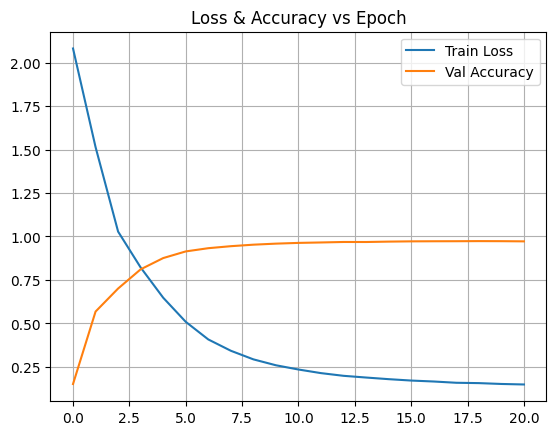

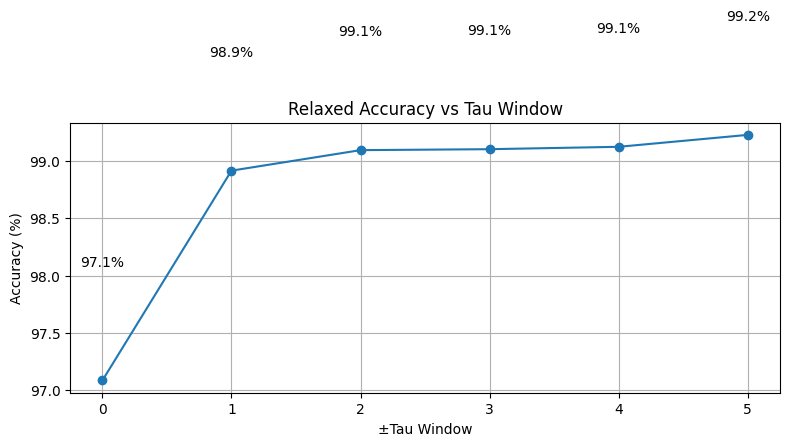

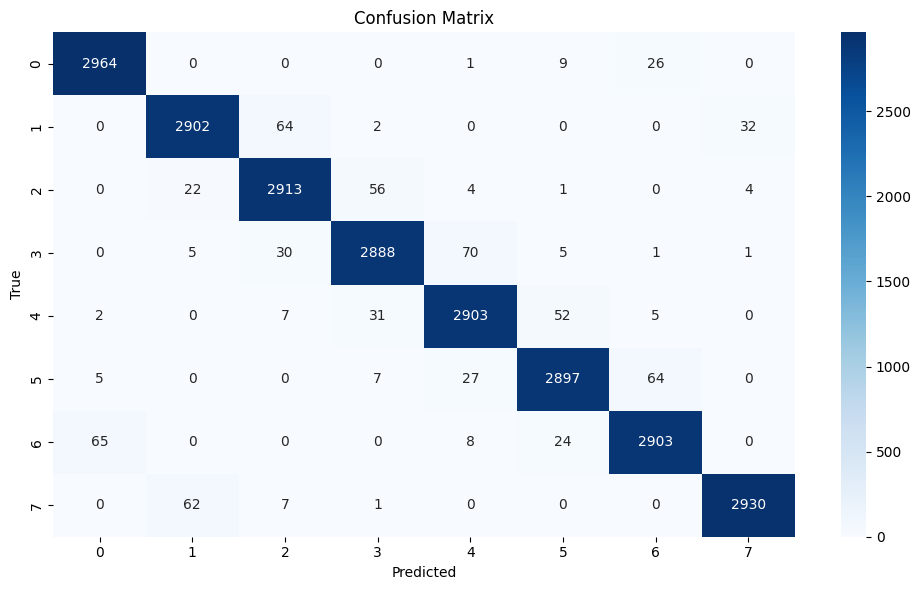

In [4]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ========== Configuration ==========
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 30000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords1.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords2.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 channels
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)   # (B, T, n) -> (B, n, T)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== SAVE + MAKE DOWNLOADABLE (Kaggle Output) ==========
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.01_codewords1"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle for one-click download in Kaggle "Output"
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts to Kaggle Output:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


***T = 7, p = 0.01, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 17.3, 43.0, 63.7, 79.5, 94.2, 100.0
For N'(training samples/class) = 2000     Accuracy = 18.8, 42.4, 63.3, 79.9, 92.7, 100.0
For N'(training samples/class) = 3000     Accuracy = 18.5, 46.2, 66.1, 82.4, 95.5, 100.0
For N'(training samples/class) = 4000     Accuracy = 82.7, 91.0, 92.0, 92.9, 100.0, 100.0
For N'(training samples/class) = 5000     Accuracy = 87.3, 93.6, 94.2, 94.9, 100.0, 100.0
For N'(training samples/class) = 6000     Accuracy = 89.2, 94.5, 95.1, 95.5, 100.0, 100.0 
For N'(training samples/class) = 8000     Accuracy = 94.5, 96.9, 97.3, 97.6, 100.0, 100.0 
For N'(training samples/class) = 10000     Accuracy = 95.3, 97,6, 97.9, 98.2, 100.0, 100.0 
For N'(training samples/class) = 11000     Accuracy = 95.9, 97.9, 98.1, 98.3, 100.0, 100.0 
For N'(training samples/class) = 12000     Accuracy = 95.6, 97.6, 97.9, 98.2, 100.0, 100.0 
For N'(training samples/class) = 15000     Accuracy = 96.7, 98.4, 98.6, 98.9, 100.0, 100.0
For N'(training samples/class) = 20000     Accuracy = 96.7, 98.4, 98.5, 98.7, 100.0, 100.0
</pre>

## p = 0.05

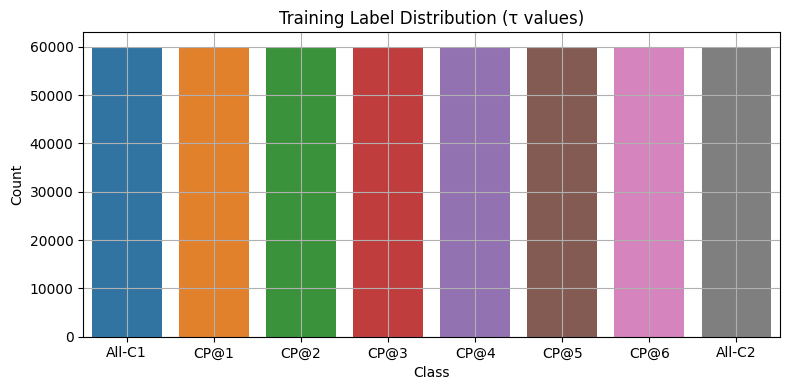

Training Epochs:   2%|▏         | 1/50 [00:40<33:16, 40.75s/it]

Epoch  1 | Train Loss: 2.0440 | Val Accuracy: 0.2997


Training Epochs:   4%|▍         | 2/50 [01:21<32:36, 40.76s/it]

Epoch  2 | Train Loss: 1.4099 | Val Accuracy: 0.5471


Training Epochs:   6%|▌         | 3/50 [02:02<31:52, 40.70s/it]

Epoch  3 | Train Loss: 1.0978 | Val Accuracy: 0.6981


Training Epochs:   8%|▊         | 4/50 [02:42<31:10, 40.66s/it]

Epoch  4 | Train Loss: 0.8944 | Val Accuracy: 0.7735


Training Epochs:  10%|█         | 5/50 [03:23<30:30, 40.67s/it]

Epoch  5 | Train Loss: 0.7599 | Val Accuracy: 0.8073


Training Epochs:  12%|█▏        | 6/50 [04:04<29:49, 40.67s/it]

Epoch  6 | Train Loss: 0.6713 | Val Accuracy: 0.8225


Training Epochs:  14%|█▍        | 7/50 [04:44<29:07, 40.63s/it]

Epoch  7 | Train Loss: 0.6205 | Val Accuracy: 0.8335


Training Epochs:  16%|█▌        | 8/50 [05:25<28:27, 40.67s/it]

Epoch  8 | Train Loss: 0.5840 | Val Accuracy: 0.8397


Training Epochs:  18%|█▊        | 9/50 [06:06<27:46, 40.66s/it]

Epoch  9 | Train Loss: 0.5551 | Val Accuracy: 0.8478


Training Epochs:  20%|██        | 10/50 [06:46<27:05, 40.63s/it]

Epoch 10 | Train Loss: 0.5327 | Val Accuracy: 0.8514


Training Epochs:  22%|██▏       | 11/50 [07:27<26:24, 40.62s/it]

Epoch 11 | Train Loss: 0.5132 | Val Accuracy: 0.8554


Training Epochs:  24%|██▍       | 12/50 [08:07<25:42, 40.59s/it]

Epoch 12 | Train Loss: 0.5013 | Val Accuracy: 0.8566


Training Epochs:  26%|██▌       | 13/50 [08:48<25:02, 40.60s/it]

Epoch 13 | Train Loss: 0.4896 | Val Accuracy: 0.8596


Training Epochs:  28%|██▊       | 14/50 [09:28<24:21, 40.59s/it]

Epoch 14 | Train Loss: 0.4809 | Val Accuracy: 0.8653


Training Epochs:  30%|███       | 15/50 [10:09<23:39, 40.55s/it]

Epoch 15 | Train Loss: 0.4736 | Val Accuracy: 0.8649


Training Epochs:  32%|███▏      | 16/50 [10:50<23:01, 40.63s/it]

Epoch 16 | Train Loss: 0.4663 | Val Accuracy: 0.8660


Training Epochs:  34%|███▍      | 17/50 [11:30<22:19, 40.58s/it]

Epoch 17 | Train Loss: 0.4598 | Val Accuracy: 0.8681


Training Epochs:  36%|███▌      | 18/50 [12:11<21:38, 40.57s/it]

Epoch 18 | Train Loss: 0.4545 | Val Accuracy: 0.8692


Training Epochs:  38%|███▊      | 19/50 [12:51<20:56, 40.53s/it]

Epoch 19 | Train Loss: 0.4506 | Val Accuracy: 0.8696


Training Epochs:  40%|████      | 20/50 [13:32<20:16, 40.54s/it]

Epoch 20 | Train Loss: 0.4454 | Val Accuracy: 0.8700


Training Epochs:  42%|████▏     | 21/50 [14:12<19:35, 40.54s/it]

Epoch 21 | Train Loss: 0.4416 | Val Accuracy: 0.8712


Training Epochs:  44%|████▍     | 22/50 [14:53<18:55, 40.56s/it]

Epoch 22 | Train Loss: 0.4382 | Val Accuracy: 0.8723


Training Epochs:  46%|████▌     | 23/50 [15:34<18:17, 40.67s/it]

Epoch 23 | Train Loss: 0.4335 | Val Accuracy: 0.8708


Training Epochs:  48%|████▊     | 24/50 [16:14<17:37, 40.68s/it]

Epoch 24 | Train Loss: 0.4298 | Val Accuracy: 0.8768


Training Epochs:  50%|█████     | 25/50 [16:55<16:55, 40.62s/it]

Epoch 25 | Train Loss: 0.4275 | Val Accuracy: 0.8737


Training Epochs:  52%|█████▏    | 26/50 [17:36<16:16, 40.67s/it]

Epoch 26 | Train Loss: 0.4249 | Val Accuracy: 0.8786


Training Epochs:  54%|█████▍    | 27/50 [18:16<15:33, 40.60s/it]

Epoch 27 | Train Loss: 0.4217 | Val Accuracy: 0.8772


Training Epochs:  54%|█████▍    | 27/50 [18:57<16:08, 42.12s/it]

Epoch 28 | Train Loss: 0.4184 | Val Accuracy: 0.8779
Early stopping triggered.



Final Test Accuracy: 0.8753


Saved artifacts to Kaggle Output:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.05_codewords1_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.05_codewords1_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.05_codewords1_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.05_codewords1_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.05_codewords1_artifacts.zip

These appear in the right-side 'Output' panel for download.


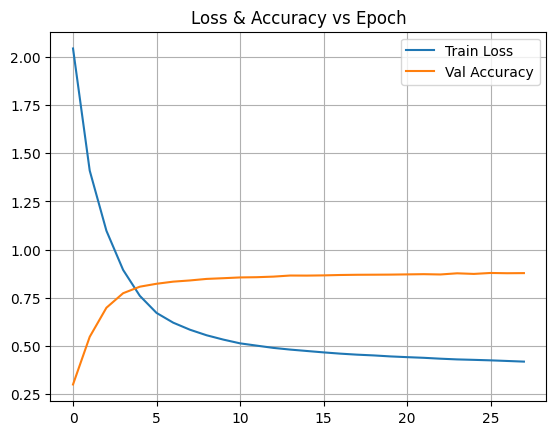

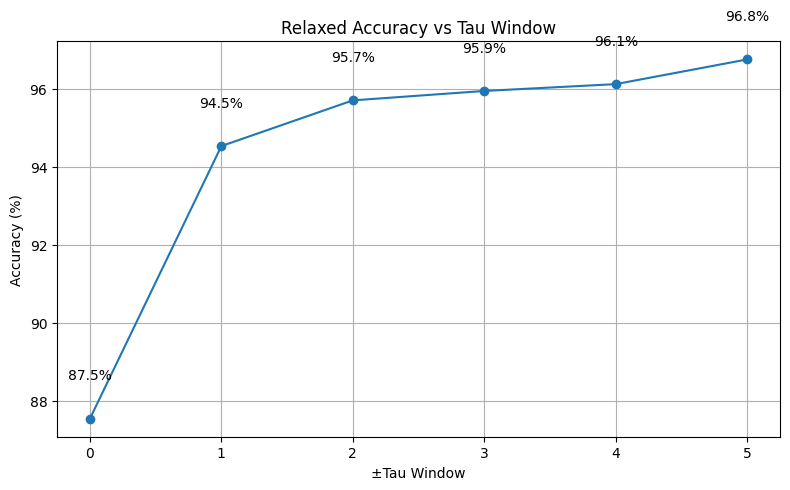

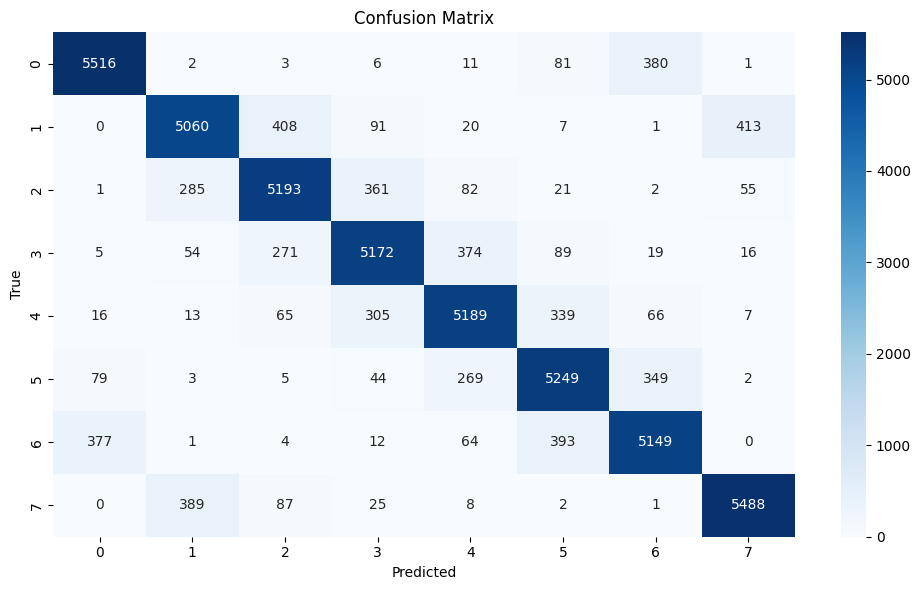

In [5]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ========== Configuration ==========
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 60000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords1.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords2.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 channels
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)   # (B, T, n) -> (B, n, T)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== SAVE + MAKE DOWNLOADABLE (Kaggle Output) ==========
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.01_codewords1"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle for one-click download in Kaggle "Output"
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts to Kaggle Output:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


***T = 7, p = 0.05, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 15.0, 40.2, 61.2, 81.5, 94.8, 100.0 
For N'(training samples/class) = 2000     Accuracy = 15.2, 42.5, 66.9, 84.5, 93.8, 100.0 
For N'(training samples/class) = 3000     Accuracy = 16.7, 45.2, 67.8, 85.4, 95.7, 100.0 
For N'(training samples/class) = 4000     Accuracy = 17.3, 45.4, 66.2, 82.8, 95.5, 100.0 
For N'(training samples/class) = 5000     Accuracy = 63.7, 79.7, 83.0, 86.9, 100.0, 100.0 
For N'(training samples/class) = 6000     Accuracy = 68.3, 86.6, 88.0, 85.1, 96.1, 100.0 
For N'(training samples/class) = 8000     Accuracy = 76.9, 87.3, 89.9, 92.6, 100.0, 100.0 
For N'(training samples/class) = 10000     Accuracy = 80.8, 89.6, 91.6, 93.4, 100.0, 100.0 
For N'(training samples/class) = 12000     Accuracy = 82.0, 90.1, 91.7, 93.5, 100.0, 100.0 
For N'(training samples/class) = 15000     Accuracy = 82.5, 90.8, 92.5, 94.3, 100.0, 100.0 
For N'(training samples/class) = 18000     Accuracy = 83.5, 91.6, 93.1. 94.4, 100.0, 100.0 
For N'(training samples/class) = 19000     Accuracy = 83.4 
For N'(training samples/class) = 20000     Accuracy = 83.6 
For N'(training samples/class) = 21000     Accuracy = 83.4 
For N'(training samples/class) = 22000     Accuracy = 83.3, 91.0, 92.5, 93.9, 100.0, 100.0 
For N'(training samples/class) = 25000     Accuracy = 83.5 
For N'(training samples/class) = 32000     Accuracy = 85.8
For N'(training samples/class) = 45000     Accuracy = 87.1, 93.1, 94.2, 95.3, 100.0, 100.0 
</pre>

## p = 0.1

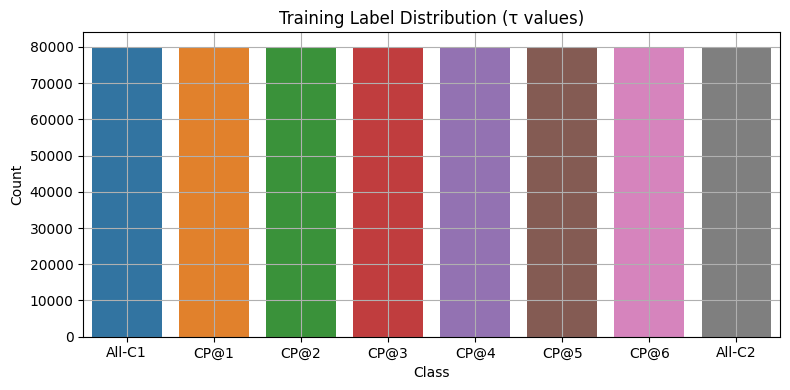

Training Epochs:   2%|▏         | 1/50 [00:54<44:27, 54.44s/it]

Epoch  1 | Train Loss: 2.0805 | Val Accuracy: 0.1318


Training Epochs:   4%|▍         | 2/50 [01:49<43:38, 54.54s/it]

Epoch  2 | Train Loss: 1.8814 | Val Accuracy: 0.3539


Training Epochs:   6%|▌         | 3/50 [02:43<42:45, 54.59s/it]

Epoch  3 | Train Loss: 1.5398 | Val Accuracy: 0.4486


Training Epochs:   8%|▊         | 4/50 [03:38<41:55, 54.69s/it]

Epoch  4 | Train Loss: 1.3805 | Val Accuracy: 0.5212


Training Epochs:  10%|█         | 5/50 [04:32<40:55, 54.58s/it]

Epoch  5 | Train Loss: 1.2674 | Val Accuracy: 0.5836


Training Epochs:  12%|█▏        | 6/50 [05:27<39:57, 54.50s/it]

Epoch  6 | Train Loss: 1.1878 | Val Accuracy: 0.6135


Training Epochs:  14%|█▍        | 7/50 [06:21<39:03, 54.51s/it]

Epoch  7 | Train Loss: 1.1308 | Val Accuracy: 0.6360


Training Epochs:  16%|█▌        | 8/50 [07:16<38:12, 54.58s/it]

Epoch  8 | Train Loss: 1.0913 | Val Accuracy: 0.6517


Training Epochs:  18%|█▊        | 9/50 [08:10<37:15, 54.53s/it]

Epoch  9 | Train Loss: 1.0621 | Val Accuracy: 0.6614


Training Epochs:  20%|██        | 10/50 [09:05<36:26, 54.66s/it]

Epoch 10 | Train Loss: 1.0375 | Val Accuracy: 0.6699


Training Epochs:  22%|██▏       | 11/50 [10:00<35:26, 54.52s/it]

Epoch 11 | Train Loss: 1.0208 | Val Accuracy: 0.6772


Training Epochs:  24%|██▍       | 12/50 [10:54<34:27, 54.41s/it]

Epoch 12 | Train Loss: 1.0058 | Val Accuracy: 0.6813


Training Epochs:  26%|██▌       | 13/50 [11:48<33:33, 54.41s/it]

Epoch 13 | Train Loss: 0.9959 | Val Accuracy: 0.6842


Training Epochs:  28%|██▊       | 14/50 [12:42<32:35, 54.33s/it]

Epoch 14 | Train Loss: 0.9864 | Val Accuracy: 0.6882


Training Epochs:  30%|███       | 15/50 [13:36<31:39, 54.27s/it]

Epoch 15 | Train Loss: 0.9800 | Val Accuracy: 0.6878


Training Epochs:  32%|███▏      | 16/50 [14:30<30:40, 54.15s/it]

Epoch 16 | Train Loss: 0.9728 | Val Accuracy: 0.6922


Training Epochs:  34%|███▍      | 17/50 [15:24<29:45, 54.11s/it]

Epoch 17 | Train Loss: 0.9686 | Val Accuracy: 0.6948


Training Epochs:  36%|███▌      | 18/50 [16:18<28:50, 54.07s/it]

Epoch 18 | Train Loss: 0.9633 | Val Accuracy: 0.6941


Training Epochs:  38%|███▊      | 19/50 [17:12<27:56, 54.08s/it]

Epoch 19 | Train Loss: 0.9570 | Val Accuracy: 0.6941


Training Epochs:  40%|████      | 20/50 [18:06<26:58, 53.97s/it]

Epoch 20 | Train Loss: 0.9526 | Val Accuracy: 0.6953


Training Epochs:  42%|████▏     | 21/50 [19:00<26:03, 53.92s/it]

Epoch 21 | Train Loss: 0.9488 | Val Accuracy: 0.6968


Training Epochs:  44%|████▍     | 22/50 [19:54<25:10, 53.93s/it]

Epoch 22 | Train Loss: 0.9451 | Val Accuracy: 0.6970


Training Epochs:  46%|████▌     | 23/50 [20:48<24:16, 53.96s/it]

Epoch 23 | Train Loss: 0.9422 | Val Accuracy: 0.6973


Training Epochs:  48%|████▊     | 24/50 [21:42<23:21, 53.89s/it]

Epoch 24 | Train Loss: 0.9392 | Val Accuracy: 0.6988


Training Epochs:  50%|█████     | 25/50 [22:36<22:28, 53.92s/it]

Epoch 25 | Train Loss: 0.9357 | Val Accuracy: 0.6992


Training Epochs:  52%|█████▏    | 26/50 [23:29<21:33, 53.90s/it]

Epoch 26 | Train Loss: 0.9334 | Val Accuracy: 0.6988


Training Epochs:  54%|█████▍    | 27/50 [24:23<20:39, 53.89s/it]

Epoch 27 | Train Loss: 0.9299 | Val Accuracy: 0.6978


Training Epochs:  56%|█████▌    | 28/50 [25:17<19:45, 53.88s/it]

Epoch 28 | Train Loss: 0.9279 | Val Accuracy: 0.6996


Training Epochs:  56%|█████▌    | 28/50 [26:11<20:34, 56.12s/it]

Epoch 29 | Train Loss: 0.9259 | Val Accuracy: 0.7005
Early stopping triggered.



Final Test Accuracy: 0.6983


Saved artifacts to Kaggle Output:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.10_codewords1_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.10_codewords1_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.10_codewords1_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.10_codewords1_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.10_codewords1_artifacts.zip

These appear in the right-side 'Output' panel for download.


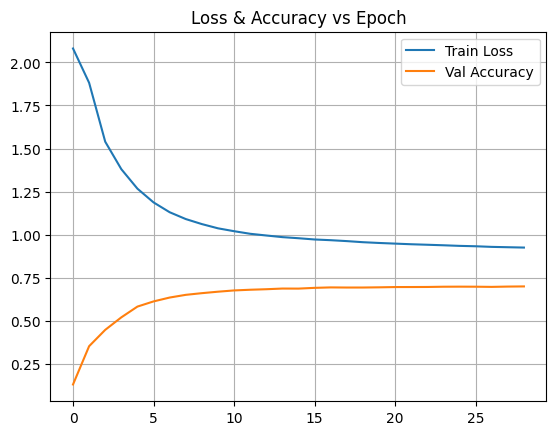

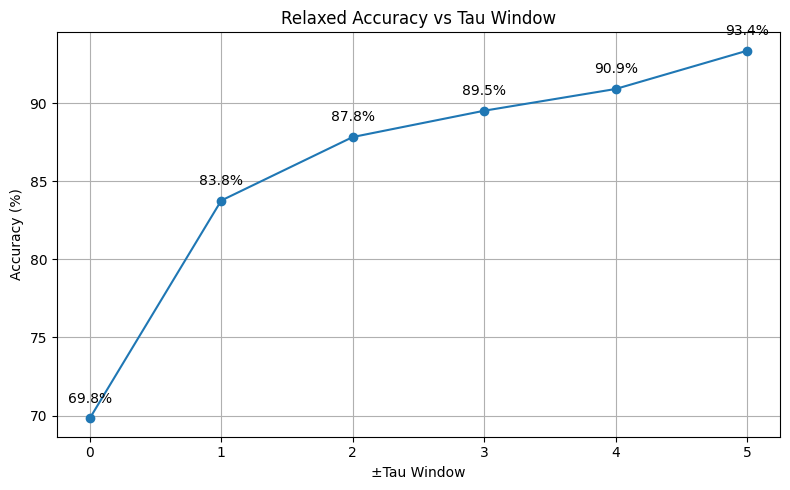

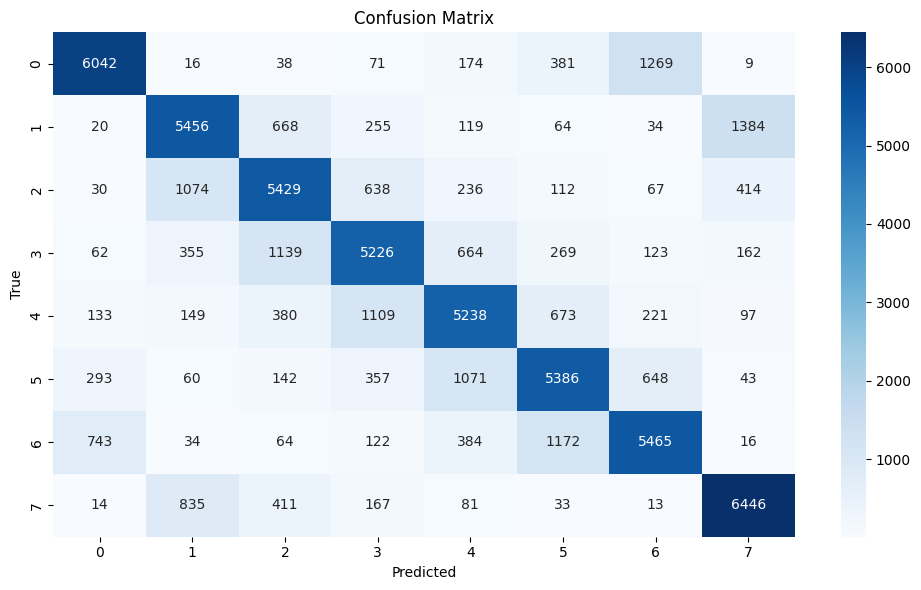

In [6]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ========== Configuration ==========
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 80000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords1.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords2.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 channels
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)   # (B, T, n) -> (B, n, T)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== SAVE + MAKE DOWNLOADABLE (Kaggle Output) ==========
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.01_codewords1"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle for one-click download in Kaggle "Output"
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts to Kaggle Output:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


***T = 7, p = 0.10, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 16.3, 43.5, 68.3, 85.0, 95.2, 100.0
For N'(training samples/class) = 2000     Accuracy = 16.5
For N'(training samples/class) = 3000     Accuracy = 15.8
For N'(training samples/class) = 4000     Accuracy = 16.6
For N'(training samples/class) = 5000     Accuracy = 20.2, 54.4, 68.5, 80.0, 98.0, 100.0
For N'(training samples/class) = 6000     Accuracy = 18.5
For N'(training samples/class) = 8000     Accuracy = 17.4, 43.8, 64.8, 81.5, 93.7, 100.0
For N'(training samples/class) = 10000     Accuracy = 16.9, 43.1, 63.8, 81.1, 94.3, 100.0
For N'(training samples/class) = 11000     Accuracy = 20.8 
For N'(training samples/class) = 15000     Accuracy = 61.5, 76.1, 82.1, 87.7, 99.5, 100.0
For N'(training samples/class) = 17000     Accuracy = 61.3
For N'(training samples/class) = 20000     Accuracy = 61.9
For N'(training samples/class) = 22000     Accuracy = 62.2
For N'(training samples/class) = 25000     Accuracy = 61.4, 76.6, 82.9, 88.6, 99.6, 100.0
For N'(training samples/class) = 32000     Accuracy = 64.8
For N'(training samples/class) = 50000     Accuracy = 70.2, 82.3, 86.6, 90.6, 99.8, 100.0
</pre>

## p = 0.2

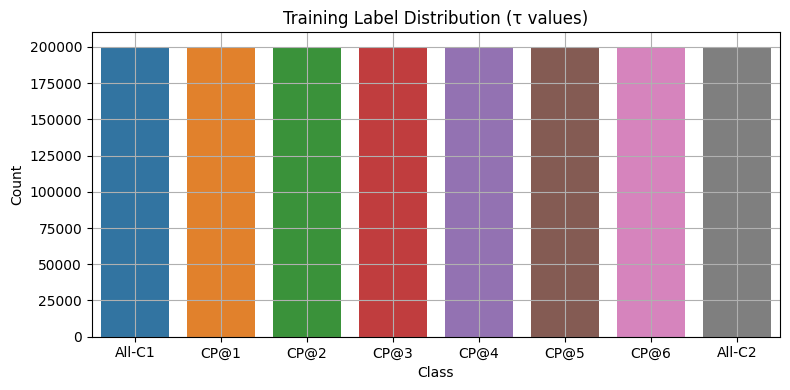

Training Epochs:   2%|▏         | 1/50 [02:13<1:48:52, 133.31s/it]

Epoch  1 | Train Loss: 2.0800 | Val Accuracy: 0.1249


Training Epochs:   4%|▍         | 2/50 [04:26<1:46:31, 133.16s/it]

Epoch  2 | Train Loss: 2.0795 | Val Accuracy: 0.1248


Training Epochs:   6%|▌         | 3/50 [06:39<1:44:15, 133.10s/it]

Epoch  3 | Train Loss: 2.0793 | Val Accuracy: 0.1310


Training Epochs:   8%|▊         | 4/50 [08:50<1:41:35, 132.50s/it]

Epoch  4 | Train Loss: 2.0726 | Val Accuracy: 0.1523


Training Epochs:  10%|█         | 5/50 [11:03<1:39:21, 132.48s/it]

Epoch  5 | Train Loss: 2.0595 | Val Accuracy: 0.1695


Training Epochs:  12%|█▏        | 6/50 [13:15<1:37:04, 132.37s/it]

Epoch  6 | Train Loss: 2.0133 | Val Accuracy: 0.2152


Training Epochs:  14%|█▍        | 7/50 [15:27<1:34:48, 132.29s/it]

Epoch  7 | Train Loss: 1.9482 | Val Accuracy: 0.2413


Training Epochs:  16%|█▌        | 8/50 [17:39<1:32:33, 132.22s/it]

Epoch  8 | Train Loss: 1.9004 | Val Accuracy: 0.2616


Training Epochs:  18%|█▊        | 9/50 [19:52<1:30:22, 132.25s/it]

Epoch  9 | Train Loss: 1.8750 | Val Accuracy: 0.2691


Training Epochs:  20%|██        | 10/50 [22:03<1:28:02, 132.07s/it]

Epoch 10 | Train Loss: 1.8605 | Val Accuracy: 0.2768


Training Epochs:  22%|██▏       | 11/50 [24:15<1:25:41, 131.82s/it]

Epoch 11 | Train Loss: 1.8499 | Val Accuracy: 0.2830


Training Epochs:  24%|██▍       | 12/50 [26:26<1:23:27, 131.78s/it]

Epoch 12 | Train Loss: 1.8406 | Val Accuracy: 0.2912


Training Epochs:  26%|██▌       | 13/50 [28:38<1:21:13, 131.72s/it]

Epoch 13 | Train Loss: 1.8317 | Val Accuracy: 0.2979


Training Epochs:  28%|██▊       | 14/50 [30:49<1:18:59, 131.64s/it]

Epoch 14 | Train Loss: 1.8266 | Val Accuracy: 0.3020


Training Epochs:  30%|███       | 15/50 [33:02<1:16:58, 131.95s/it]

Epoch 15 | Train Loss: 1.8221 | Val Accuracy: 0.3057


Training Epochs:  32%|███▏      | 16/50 [35:13<1:14:39, 131.75s/it]

Epoch 16 | Train Loss: 1.8183 | Val Accuracy: 0.3089


Training Epochs:  34%|███▍      | 17/50 [37:25<1:12:30, 131.83s/it]

Epoch 17 | Train Loss: 1.8133 | Val Accuracy: 0.3160


Training Epochs:  36%|███▌      | 18/50 [39:37<1:10:17, 131.80s/it]

Epoch 18 | Train Loss: 1.8102 | Val Accuracy: 0.3184


Training Epochs:  38%|███▊      | 19/50 [41:49<1:08:06, 131.83s/it]

Epoch 19 | Train Loss: 1.8077 | Val Accuracy: 0.3214


Training Epochs:  40%|████      | 20/50 [44:01<1:05:53, 131.79s/it]

Epoch 20 | Train Loss: 1.8055 | Val Accuracy: 0.3209


Training Epochs:  42%|████▏     | 21/50 [46:12<1:03:42, 131.81s/it]

Epoch 21 | Train Loss: 1.8035 | Val Accuracy: 0.3235


Training Epochs:  44%|████▍     | 22/50 [48:24<1:01:31, 131.84s/it]

Epoch 22 | Train Loss: 1.8014 | Val Accuracy: 0.3257


Training Epochs:  46%|████▌     | 23/50 [50:36<59:18, 131.80s/it]  

Epoch 23 | Train Loss: 1.8006 | Val Accuracy: 0.3262


Training Epochs:  48%|████▊     | 24/50 [52:48<57:09, 131.91s/it]

Epoch 24 | Train Loss: 1.7996 | Val Accuracy: 0.3279


Training Epochs:  50%|█████     | 25/50 [55:00<54:56, 131.84s/it]

Epoch 25 | Train Loss: 1.7980 | Val Accuracy: 0.3283


Training Epochs:  52%|█████▏    | 26/50 [57:12<52:44, 131.86s/it]

Epoch 26 | Train Loss: 1.7957 | Val Accuracy: 0.3286


Training Epochs:  54%|█████▍    | 27/50 [59:24<50:35, 131.97s/it]

Epoch 27 | Train Loss: 1.7946 | Val Accuracy: 0.3285


Training Epochs:  56%|█████▌    | 28/50 [1:01:36<48:21, 131.88s/it]

Epoch 28 | Train Loss: 1.7942 | Val Accuracy: 0.3302


Training Epochs:  58%|█████▊    | 29/50 [1:03:47<46:07, 131.78s/it]

Epoch 29 | Train Loss: 1.7932 | Val Accuracy: 0.3297


Training Epochs:  60%|██████    | 30/50 [1:05:59<43:53, 131.68s/it]

Epoch 30 | Train Loss: 1.7922 | Val Accuracy: 0.3292


Training Epochs:  62%|██████▏   | 31/50 [1:08:10<41:40, 131.61s/it]

Epoch 31 | Train Loss: 1.7908 | Val Accuracy: 0.3319


Training Epochs:  62%|██████▏   | 31/50 [1:10:22<43:07, 136.20s/it]

Epoch 32 | Train Loss: 1.7906 | Val Accuracy: 0.3303
Early stopping triggered.



Final Test Accuracy: 0.3296


Saved artifacts to Kaggle Output:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.20_codewords1_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.20_codewords1_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.20_codewords1_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.20_codewords1_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.20_codewords1_artifacts.zip

These appear in the right-side 'Output' panel for download.


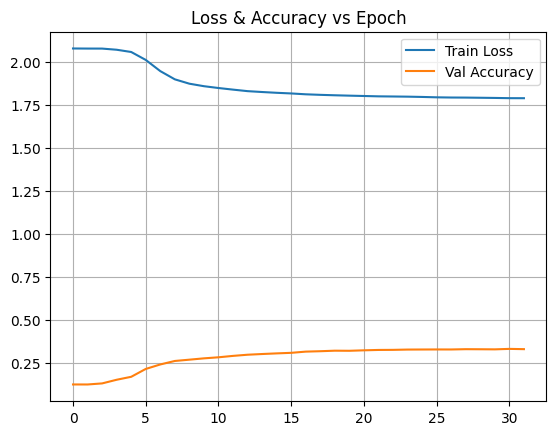

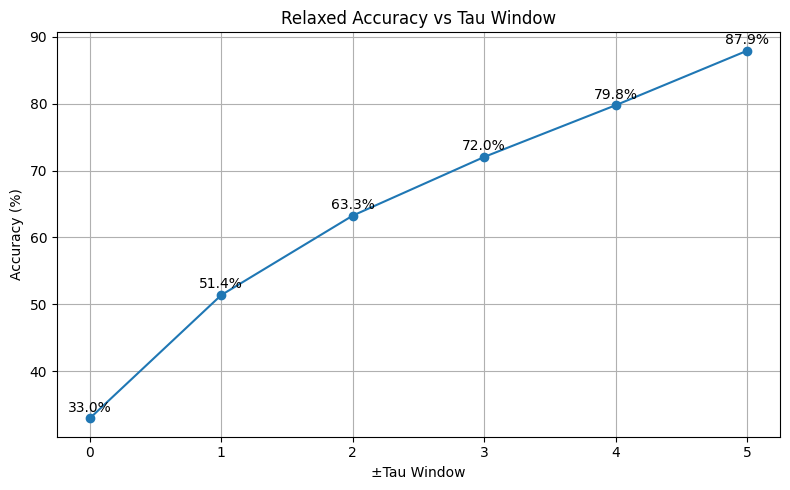

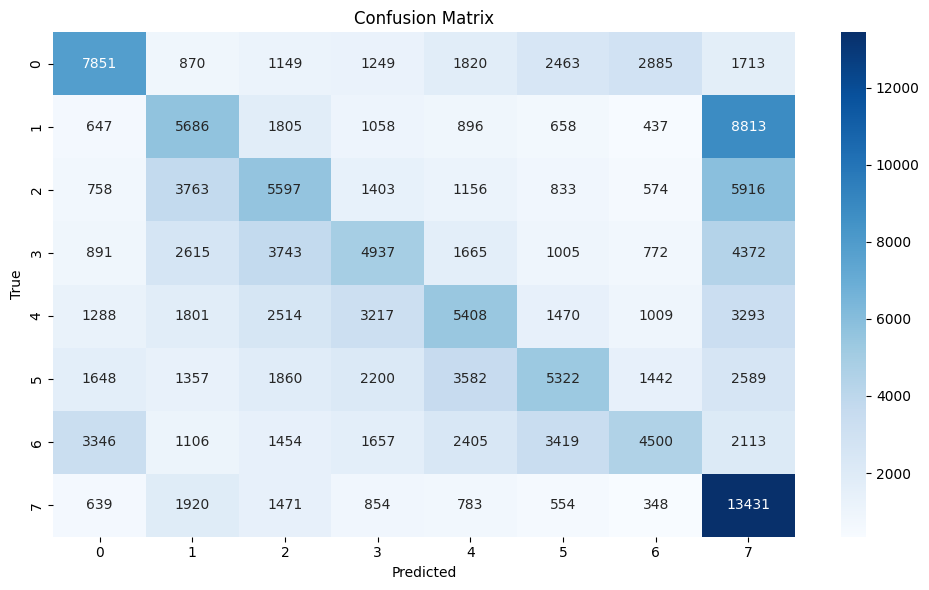

In [1]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ========== Configuration ==========
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 200000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords1.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords2.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 channels
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)   # (B, T, n) -> (B, n, T)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== SAVE + MAKE DOWNLOADABLE (Kaggle Output) ==========
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.01_codewords1"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle for one-click download in Kaggle "Output"
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts to Kaggle Output:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


***T = 7, p = 0.20, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 18.0, 46.0, 72.2, 86.8, 95.8, 100.0
For N'(training samples/class) = 2000     Accuracy = 17.5
For N'(training samples/class) = 3000     Accuracy = 17.8
For N'(training samples/class) = 4000     Accuracy = 16.3
For N'(training samples/class) = 5000     Accuracy = 18.1
For N'(training samples/class) = 6000     Accuracy = 16.5
For N'(training samples/class) = 8000     Accuracy = 15.8
For N'(training samples/class) = 10000     Accuracy = 15.9, 44.5, 66.0, 82,9, 93.9, 100.0
For N'(training samples/class) = 11000     Accuracy = 16.5
For N'(training samples/class) = 15000     Accuracy = 17.1
For N'(training samples/class) = 30000     Accuracy = 16.6, 45.1, 66.7, 83.5, 95.6, 100.0
For N'(training samples/class) = 50000     Accuracy = 16.8, 47.2, 68.5, 85.1, 97.2, 100.0
For N'(training samples/class) = 70000     Accuracy = 28.5   (check required) 
For N'(training samples/class) = 90000     Accuracy = 
For N'(training samples/class) = 100000     Accuracy = 35.3, 55.7, 70.0, 82.4, 96.8, 100.0
For N'(training samples/class) = 120000     Accuracy = 35.5, 58.6, 72.3, 81.5, 95.5, 100.0
</pre> 

## p = 0.001

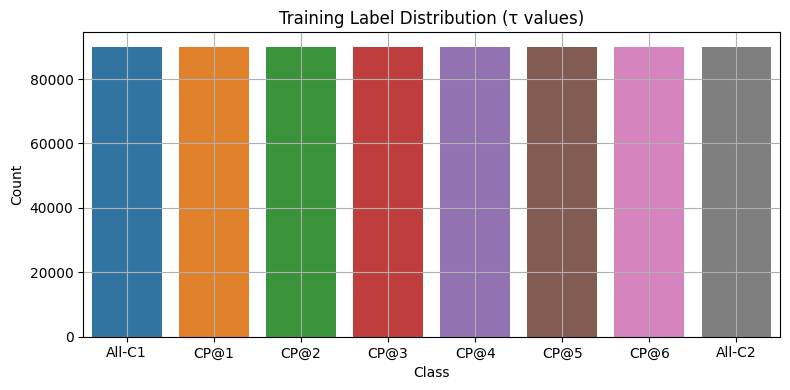

Training Epochs:   2%|▏         | 1/50 [00:59<48:58, 59.96s/it]

Epoch  1 | Train Loss: 2.0805 | Val Accuracy: 0.1293


Training Epochs:   4%|▍         | 2/50 [02:00<48:01, 60.03s/it]

Epoch  2 | Train Loss: 1.9982 | Val Accuracy: 0.3771


Training Epochs:   6%|▌         | 3/50 [02:59<46:55, 59.91s/it]

Epoch  3 | Train Loss: 1.0970 | Val Accuracy: 0.7935


Training Epochs:   8%|▊         | 4/50 [03:59<45:59, 60.00s/it]

Epoch  4 | Train Loss: 0.6680 | Val Accuracy: 0.8843


Training Epochs:  10%|█         | 5/50 [05:00<45:01, 60.04s/it]

Epoch  5 | Train Loss: 0.5099 | Val Accuracy: 0.9177


Training Epochs:  12%|█▏        | 6/50 [06:00<44:02, 60.05s/it]

Epoch  6 | Train Loss: 0.4403 | Val Accuracy: 0.9247


Training Epochs:  14%|█▍        | 7/50 [07:00<43:01, 60.04s/it]

Epoch  7 | Train Loss: 0.4094 | Val Accuracy: 0.9259


Training Epochs:  16%|█▌        | 8/50 [08:00<42:01, 60.04s/it]

Epoch  8 | Train Loss: 0.3910 | Val Accuracy: 0.9268


Training Epochs:  18%|█▊        | 9/50 [09:00<40:59, 59.98s/it]

Epoch  9 | Train Loss: 0.3797 | Val Accuracy: 0.9270


Training Epochs:  20%|██        | 10/50 [10:00<40:02, 60.07s/it]

Epoch 10 | Train Loss: 0.3660 | Val Accuracy: 0.9276


Training Epochs:  22%|██▏       | 11/50 [11:00<39:01, 60.03s/it]

Epoch 11 | Train Loss: 0.3549 | Val Accuracy: 0.9281


Training Epochs:  24%|██▍       | 12/50 [12:00<38:02, 60.05s/it]

Epoch 12 | Train Loss: 0.3472 | Val Accuracy: 0.9285


Training Epochs:  24%|██▍       | 12/50 [13:00<41:10, 65.02s/it]

Epoch 13 | Train Loss: 0.3401 | Val Accuracy: 0.9286
Early stopping triggered.



Final Test Accuracy: 0.9286


Saved artifacts:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.001_C1_n15_k11_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.001_C1_n15_k11_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.001_C1_n15_k11_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.001_C1_n15_k11_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.001_C1_n15_k11_artifacts.zip

These appear in the right-side 'Output' panel for download.


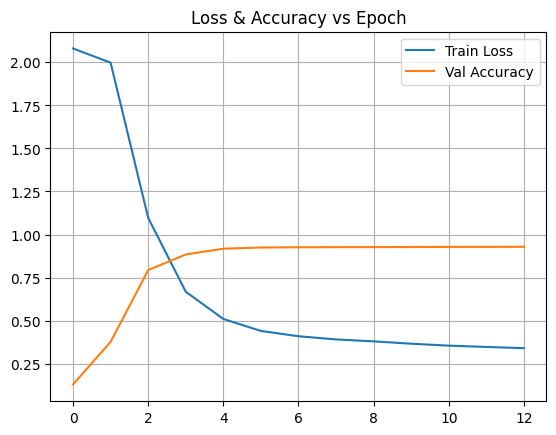

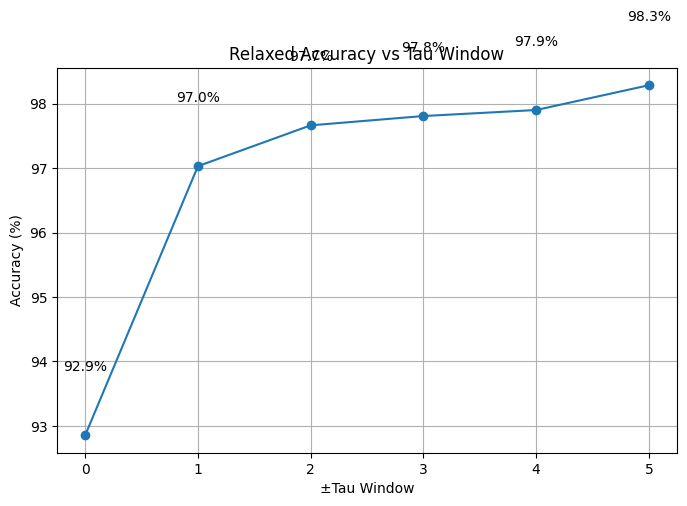

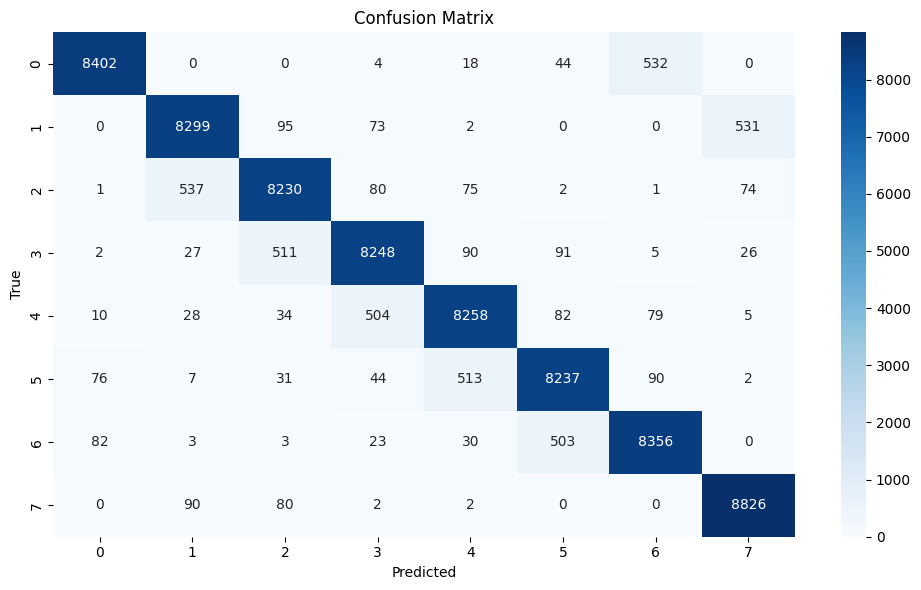

In [3]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ================== Configuration ==================
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 90000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples
BATCH_SIZE   = 64
PATIENCE     = 5
VAL_DELTA    = 0.002
LEARNING_RATE= 1e-4
MAX_EPOCHS   = 50

# ================== Set Seeds ==================
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ================== Load Data ==================
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.001_C1_n15_k11.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.001_C2_n15_k7.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]  # n

# ================== Dataset Generator ==================
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    """
    Returns:
      Data:  shape (N_per_class*(T+1), T, n)
      Labels: length N_per_class*(T+1), labels in {0,1,...,T}
        class 0  : all-C1
        class T  : all-C2
        class t  : changepoint at t (1..T-1)
    """
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                idx = np.random.choice(len(csv1_data), T, replace=True)
                sample = csv1_data[idx]
            elif cls == T:
                idx = np.random.choice(len(csv2_data), T, replace=True)
                sample = csv2_data[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ================== Create Datasets ==================
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ================== Plot Label Distribution ==================
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(
    ticks=np.arange(NUM_CLASSES),
    labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
)
plt.grid(True)
plt.tight_layout()
plt.show()

# ================== Dataset Wrapper ==================
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  # (N, T, n)
        self.y = torch.tensor(y, dtype=torch.long)     # (N,)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ================== Model ==================
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1   = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2   = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc  = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1d(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)     # logits over {0,...,T}
        )

    def forward(self, x):
        # x: (B, T, n) -> (B, n, T) for Conv1d
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)  # (B, C, 1)
        return self.classifier(x)    # (B, T+1)

# ================== Training ==================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    # ---- train
    model.train()
    running_loss = 0.0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # ---- validate
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    # ---- early stopping check
    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ================== Evaluation ==================
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds   = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc  = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ================== Save Artifacts (Kaggle) ==================
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.08_C1_n15_k11"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    # Fallback to trace if scripting fails
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle everything for one-click download in Kaggle Output
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ================== Relaxed Accuracy & Plots ==================
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


## p = 0.005

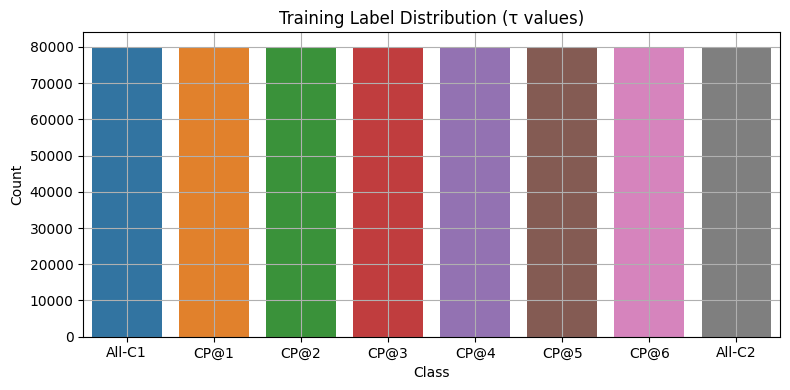

Training Epochs:   2%|▏         | 1/50 [00:53<43:20, 53.07s/it]

Epoch  1 | Train Loss: 2.0806 | Val Accuracy: 0.1259


Training Epochs:   4%|▍         | 2/50 [01:46<42:41, 53.36s/it]

Epoch  2 | Train Loss: 2.0191 | Val Accuracy: 0.3198


Training Epochs:   6%|▌         | 3/50 [02:40<41:48, 53.38s/it]

Epoch  3 | Train Loss: 1.4142 | Val Accuracy: 0.6431


Training Epochs:   8%|▊         | 4/50 [03:33<40:56, 53.40s/it]

Epoch  4 | Train Loss: 1.0495 | Val Accuracy: 0.7543


Training Epochs:  10%|█         | 5/50 [04:26<40:00, 53.34s/it]

Epoch  5 | Train Loss: 0.7770 | Val Accuracy: 0.8508


Training Epochs:  12%|█▏        | 6/50 [05:19<39:05, 53.30s/it]

Epoch  6 | Train Loss: 0.6268 | Val Accuracy: 0.8664


Training Epochs:  14%|█▍        | 7/50 [06:13<38:16, 53.41s/it]

Epoch  7 | Train Loss: 0.5875 | Val Accuracy: 0.8697


Training Epochs:  16%|█▌        | 8/50 [07:07<37:26, 53.48s/it]

Epoch  8 | Train Loss: 0.5584 | Val Accuracy: 0.8759


Training Epochs:  18%|█▊        | 9/50 [08:00<36:31, 53.45s/it]

Epoch  9 | Train Loss: 0.5366 | Val Accuracy: 0.8782


Training Epochs:  20%|██        | 10/50 [08:54<35:38, 53.47s/it]

Epoch 10 | Train Loss: 0.5192 | Val Accuracy: 0.8806


Training Epochs:  22%|██▏       | 11/50 [09:47<34:42, 53.41s/it]

Epoch 11 | Train Loss: 0.5041 | Val Accuracy: 0.8842


Training Epochs:  24%|██▍       | 12/50 [10:40<33:50, 53.45s/it]

Epoch 12 | Train Loss: 0.4869 | Val Accuracy: 0.8890


Training Epochs:  26%|██▌       | 13/50 [11:34<33:01, 53.56s/it]

Epoch 13 | Train Loss: 0.4685 | Val Accuracy: 0.8932


Training Epochs:  28%|██▊       | 14/50 [12:28<32:07, 53.55s/it]

Epoch 14 | Train Loss: 0.4500 | Val Accuracy: 0.8981


Training Epochs:  30%|███       | 15/50 [13:21<31:12, 53.49s/it]

Epoch 15 | Train Loss: 0.4312 | Val Accuracy: 0.9030


Training Epochs:  32%|███▏      | 16/50 [14:14<30:16, 53.42s/it]

Epoch 16 | Train Loss: 0.4136 | Val Accuracy: 0.9065


Training Epochs:  34%|███▍      | 17/50 [15:08<29:22, 53.41s/it]

Epoch 17 | Train Loss: 0.3973 | Val Accuracy: 0.9105


Training Epochs:  36%|███▌      | 18/50 [16:01<28:28, 53.40s/it]

Epoch 18 | Train Loss: 0.3801 | Val Accuracy: 0.9136


Training Epochs:  38%|███▊      | 19/50 [16:55<27:36, 53.43s/it]

Epoch 19 | Train Loss: 0.3656 | Val Accuracy: 0.9170


Training Epochs:  40%|████      | 20/50 [17:48<26:42, 53.40s/it]

Epoch 20 | Train Loss: 0.3532 | Val Accuracy: 0.9197


Training Epochs:  42%|████▏     | 21/50 [18:42<25:50, 53.45s/it]

Epoch 21 | Train Loss: 0.3412 | Val Accuracy: 0.9226


Training Epochs:  44%|████▍     | 22/50 [19:35<24:58, 53.50s/it]

Epoch 22 | Train Loss: 0.3315 | Val Accuracy: 0.9236


Training Epochs:  46%|████▌     | 23/50 [20:29<24:04, 53.49s/it]

Epoch 23 | Train Loss: 0.3238 | Val Accuracy: 0.9257


Training Epochs:  48%|████▊     | 24/50 [21:22<23:09, 53.44s/it]

Epoch 24 | Train Loss: 0.3172 | Val Accuracy: 0.9269


Training Epochs:  50%|█████     | 25/50 [22:15<22:14, 53.36s/it]

Epoch 25 | Train Loss: 0.3116 | Val Accuracy: 0.9271


Training Epochs:  52%|█████▏    | 26/50 [23:08<21:19, 53.32s/it]

Epoch 26 | Train Loss: 0.3072 | Val Accuracy: 0.9283


Training Epochs:  54%|█████▍    | 27/50 [24:02<20:26, 53.30s/it]

Epoch 27 | Train Loss: 0.3032 | Val Accuracy: 0.9293


Training Epochs:  56%|█████▌    | 28/50 [24:55<19:32, 53.27s/it]

Epoch 28 | Train Loss: 0.3005 | Val Accuracy: 0.9305


Training Epochs:  58%|█████▊    | 29/50 [25:48<18:38, 53.27s/it]

Epoch 29 | Train Loss: 0.2978 | Val Accuracy: 0.9299


Training Epochs:  60%|██████    | 30/50 [26:41<17:44, 53.24s/it]

Epoch 30 | Train Loss: 0.2954 | Val Accuracy: 0.9302


Training Epochs:  62%|██████▏   | 31/50 [27:35<16:52, 53.28s/it]

Epoch 31 | Train Loss: 0.2929 | Val Accuracy: 0.9309


Training Epochs:  64%|██████▍   | 32/50 [28:28<15:59, 53.30s/it]

Epoch 32 | Train Loss: 0.2907 | Val Accuracy: 0.9309


Training Epochs:  64%|██████▍   | 32/50 [29:21<16:30, 55.05s/it]

Epoch 33 | Train Loss: 0.2881 | Val Accuracy: 0.9316
Early stopping triggered.



Final Test Accuracy: 0.9300


Saved artifacts:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.005_C1_n15_k11_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.005_C1_n15_k11_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.005_C1_n15_k11_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.005_C1_n15_k11_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.005_C1_n15_k11_artifacts.zip

These appear in the right-side 'Output' panel for download.


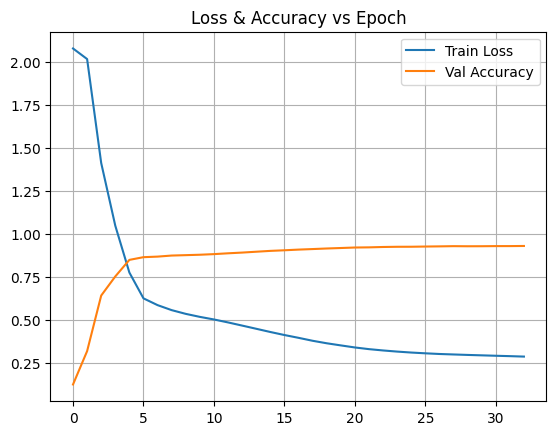

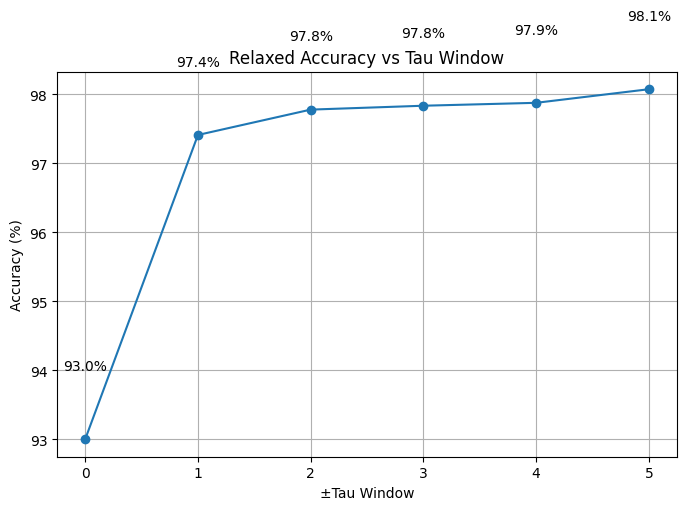

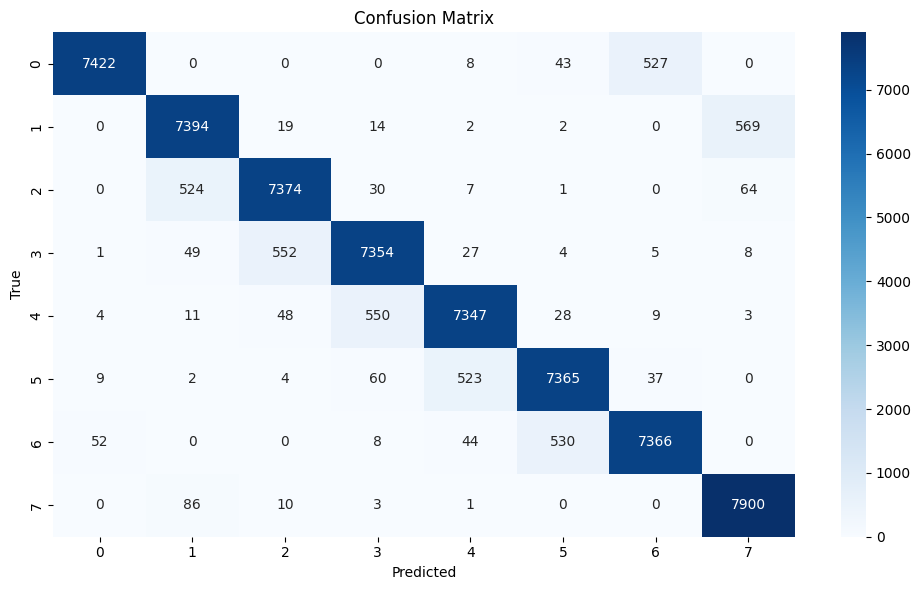

In [4]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ================== Configuration ==================
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 80000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples
BATCH_SIZE   = 64
PATIENCE     = 5
VAL_DELTA    = 0.002
LEARNING_RATE= 1e-4
MAX_EPOCHS   = 50

# ================== Set Seeds ==================
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ================== Load Data ==================
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.005_C1_n15_k11.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.005_C2_n15_k7.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]  # n

# ================== Dataset Generator ==================
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    """
    Returns:
      Data:  shape (N_per_class*(T+1), T, n)
      Labels: length N_per_class*(T+1), labels in {0,1,...,T}
        class 0  : all-C1
        class T  : all-C2
        class t  : changepoint at t (1..T-1)
    """
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                idx = np.random.choice(len(csv1_data), T, replace=True)
                sample = csv1_data[idx]
            elif cls == T:
                idx = np.random.choice(len(csv2_data), T, replace=True)
                sample = csv2_data[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ================== Create Datasets ==================
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ================== Plot Label Distribution ==================
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(
    ticks=np.arange(NUM_CLASSES),
    labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
)
plt.grid(True)
plt.tight_layout()
plt.show()

# ================== Dataset Wrapper ==================
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  # (N, T, n)
        self.y = torch.tensor(y, dtype=torch.long)     # (N,)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ================== Model ==================
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1   = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2   = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc  = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1d(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)     # logits over {0,...,T}
        )

    def forward(self, x):
        # x: (B, T, n) -> (B, n, T) for Conv1d
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)  # (B, C, 1)
        return self.classifier(x)    # (B, T+1)

# ================== Training ==================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    # ---- train
    model.train()
    running_loss = 0.0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # ---- validate
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    # ---- early stopping check
    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ================== Evaluation ==================
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds   = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc  = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ================== Save Artifacts (Kaggle) ==================
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.08_C1_n15_k11"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    # Fallback to trace if scripting fails
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle everything for one-click download in Kaggle Output
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ================== Relaxed Accuracy & Plots ==================
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


## p = 0.08

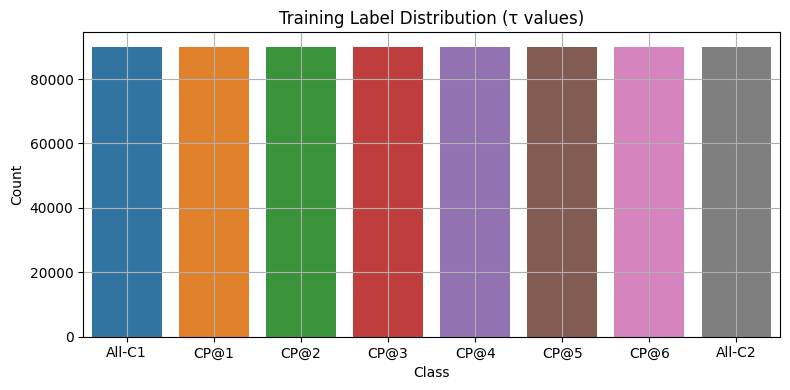

Training Epochs:   2%|▏         | 1/50 [01:00<49:13, 60.27s/it]

Epoch  1 | Train Loss: 2.0805 | Val Accuracy: 0.1273


Training Epochs:   4%|▍         | 2/50 [02:00<48:23, 60.50s/it]

Epoch  2 | Train Loss: 2.0795 | Val Accuracy: 0.1263


Training Epochs:   6%|▌         | 3/50 [03:01<47:26, 60.57s/it]

Epoch  3 | Train Loss: 2.0793 | Val Accuracy: 0.1273


Training Epochs:   8%|▊         | 4/50 [04:02<46:29, 60.63s/it]

Epoch  4 | Train Loss: 2.0768 | Val Accuracy: 0.1477


Training Epochs:  10%|█         | 5/50 [05:02<45:27, 60.60s/it]

Epoch  5 | Train Loss: 1.9835 | Val Accuracy: 0.2515


Training Epochs:  12%|█▏        | 6/50 [06:03<44:26, 60.60s/it]

Epoch  6 | Train Loss: 1.8866 | Val Accuracy: 0.2719


Training Epochs:  14%|█▍        | 7/50 [07:03<43:24, 60.57s/it]

Epoch  7 | Train Loss: 1.7954 | Val Accuracy: 0.3258


Training Epochs:  16%|█▌        | 8/50 [08:04<42:21, 60.50s/it]

Epoch  8 | Train Loss: 1.7163 | Val Accuracy: 0.3514


Training Epochs:  18%|█▊        | 9/50 [09:04<41:19, 60.47s/it]

Epoch  9 | Train Loss: 1.6682 | Val Accuracy: 0.3701


Training Epochs:  20%|██        | 10/50 [10:05<40:20, 60.52s/it]

Epoch 10 | Train Loss: 1.6288 | Val Accuracy: 0.3892


Training Epochs:  22%|██▏       | 11/50 [11:05<39:18, 60.47s/it]

Epoch 11 | Train Loss: 1.5927 | Val Accuracy: 0.4053


Training Epochs:  24%|██▍       | 12/50 [12:06<38:20, 60.55s/it]

Epoch 12 | Train Loss: 1.5633 | Val Accuracy: 0.4226


Training Epochs:  26%|██▌       | 13/50 [13:06<37:15, 60.43s/it]

Epoch 13 | Train Loss: 1.5379 | Val Accuracy: 0.4381


Training Epochs:  28%|██▊       | 14/50 [14:06<36:13, 60.37s/it]

Epoch 14 | Train Loss: 1.5122 | Val Accuracy: 0.4538


Training Epochs:  30%|███       | 15/50 [15:07<35:12, 60.36s/it]

Epoch 15 | Train Loss: 1.4816 | Val Accuracy: 0.4723


Training Epochs:  32%|███▏      | 16/50 [16:07<34:14, 60.43s/it]

Epoch 16 | Train Loss: 1.4468 | Val Accuracy: 0.4948


Training Epochs:  34%|███▍      | 17/50 [17:08<33:14, 60.45s/it]

Epoch 17 | Train Loss: 1.4148 | Val Accuracy: 0.5126


Training Epochs:  36%|███▌      | 18/50 [18:08<32:12, 60.41s/it]

Epoch 18 | Train Loss: 1.3895 | Val Accuracy: 0.5277


Training Epochs:  38%|███▊      | 19/50 [19:08<31:12, 60.40s/it]

Epoch 19 | Train Loss: 1.3680 | Val Accuracy: 0.5422


Training Epochs:  40%|████      | 20/50 [20:09<30:13, 60.45s/it]

Epoch 20 | Train Loss: 1.3457 | Val Accuracy: 0.5526


Training Epochs:  42%|████▏     | 21/50 [21:10<29:14, 60.51s/it]

Epoch 21 | Train Loss: 1.3259 | Val Accuracy: 0.5645


Training Epochs:  44%|████▍     | 22/50 [22:10<28:13, 60.50s/it]

Epoch 22 | Train Loss: 1.3088 | Val Accuracy: 0.5687


Training Epochs:  46%|████▌     | 23/50 [23:11<27:12, 60.47s/it]

Epoch 23 | Train Loss: 1.2927 | Val Accuracy: 0.5746


Training Epochs:  48%|████▊     | 24/50 [24:11<26:12, 60.49s/it]

Epoch 24 | Train Loss: 1.2823 | Val Accuracy: 0.5774


Training Epochs:  50%|█████     | 25/50 [25:11<25:10, 60.42s/it]

Epoch 25 | Train Loss: 1.2711 | Val Accuracy: 0.5840


Training Epochs:  52%|█████▏    | 26/50 [26:12<24:08, 60.37s/it]

Epoch 26 | Train Loss: 1.2598 | Val Accuracy: 0.5819


Training Epochs:  54%|█████▍    | 27/50 [27:12<23:09, 60.40s/it]

Epoch 27 | Train Loss: 1.2499 | Val Accuracy: 0.5859


Training Epochs:  56%|█████▌    | 28/50 [28:13<22:09, 60.44s/it]

Epoch 28 | Train Loss: 1.2403 | Val Accuracy: 0.5895


Training Epochs:  58%|█████▊    | 29/50 [29:13<21:07, 60.35s/it]

Epoch 29 | Train Loss: 1.2322 | Val Accuracy: 0.5893


Training Epochs:  60%|██████    | 30/50 [30:13<20:08, 60.44s/it]

Epoch 30 | Train Loss: 1.2250 | Val Accuracy: 0.5927


Training Epochs:  62%|██████▏   | 31/50 [31:14<19:10, 60.55s/it]

Epoch 31 | Train Loss: 1.2150 | Val Accuracy: 0.5925


Training Epochs:  64%|██████▍   | 32/50 [32:15<18:09, 60.52s/it]

Epoch 32 | Train Loss: 1.2082 | Val Accuracy: 0.5951


Training Epochs:  66%|██████▌   | 33/50 [33:15<17:09, 60.58s/it]

Epoch 33 | Train Loss: 1.2020 | Val Accuracy: 0.5955


Training Epochs:  68%|██████▊   | 34/50 [34:16<16:08, 60.50s/it]

Epoch 34 | Train Loss: 1.1944 | Val Accuracy: 0.5987


Training Epochs:  70%|███████   | 35/50 [35:16<15:07, 60.51s/it]

Epoch 35 | Train Loss: 1.1899 | Val Accuracy: 0.5971


Training Epochs:  72%|███████▏  | 36/50 [36:17<14:07, 60.54s/it]

Epoch 36 | Train Loss: 1.1845 | Val Accuracy: 0.6030


Training Epochs:  74%|███████▍  | 37/50 [37:17<13:07, 60.54s/it]

Epoch 37 | Train Loss: 1.1788 | Val Accuracy: 0.6009


Training Epochs:  76%|███████▌  | 38/50 [38:18<12:08, 60.67s/it]

Epoch 38 | Train Loss: 1.1751 | Val Accuracy: 0.6007


Training Epochs:  78%|███████▊  | 39/50 [39:19<11:07, 60.66s/it]

Epoch 39 | Train Loss: 1.1687 | Val Accuracy: 0.5978


Training Epochs:  80%|████████  | 40/50 [40:20<10:06, 60.68s/it]

Epoch 40 | Train Loss: 1.1643 | Val Accuracy: 0.6008


Training Epochs:  80%|████████  | 40/50 [41:20<10:20, 62.02s/it]

Epoch 41 | Train Loss: 1.1501 | Val Accuracy: 0.6029
Early stopping triggered.



Final Test Accuracy: 0.6050


Saved artifacts:
  state_dict -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.08_C1_n15_k11_state.pth
  full model -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.08_C1_n15_k11_full.pth
  TorchScript -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.08_C1_n15_k11_model.pt
  metadata -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.08_C1_n15_k11_meta.json
  ZIP bundle  -> /kaggle/working/cpd_T7_n15_seed0_bsc_p0.08_C1_n15_k11_artifacts.zip

These appear in the right-side 'Output' panel for download.


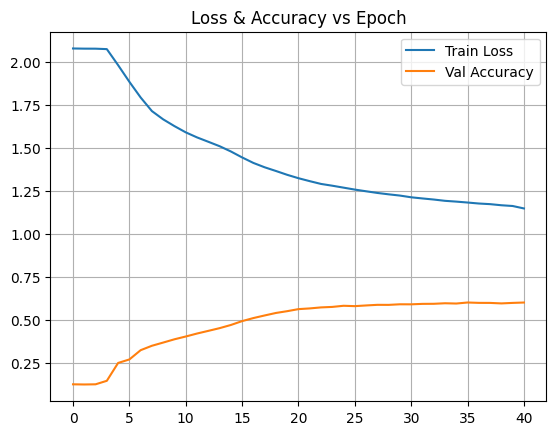

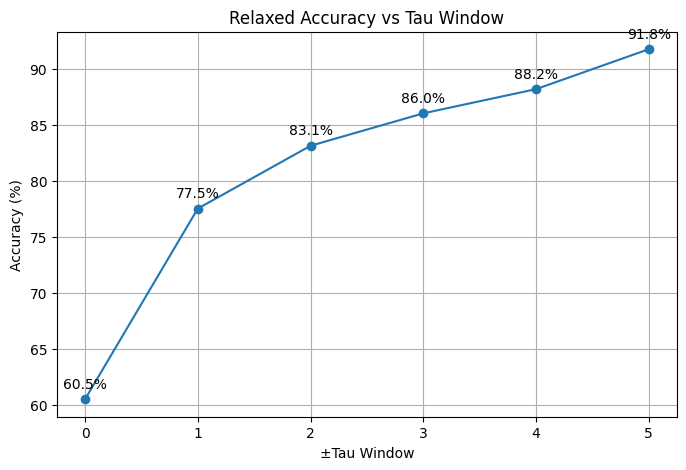

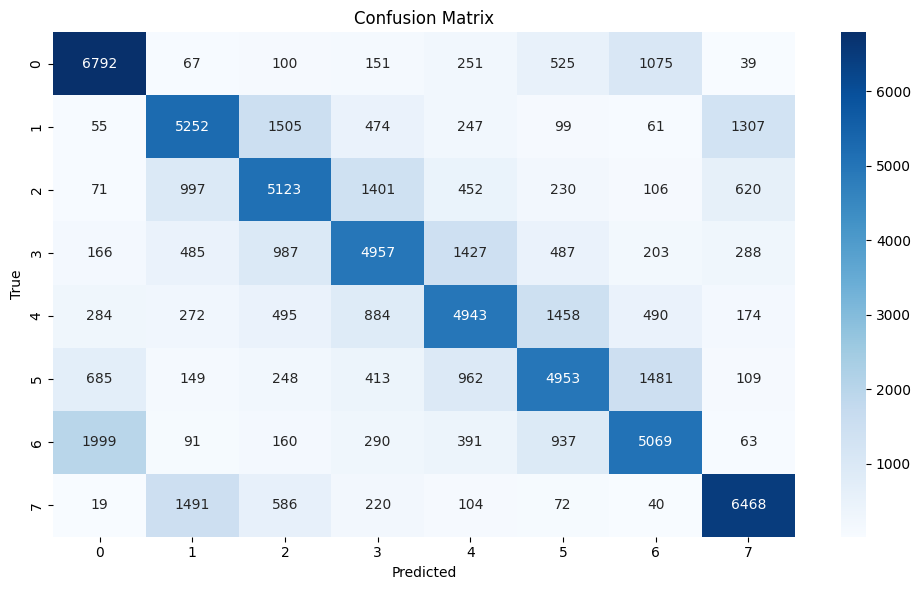

In [5]:
# ===================== Full CPD Window Classifier Training Script =====================

# ---- Imports
import os, json, copy, random, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import trange

# ================== Configuration ==================
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 90000
SAMPLES_PER_CLASS_TEST  = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples
BATCH_SIZE   = 64
PATIENCE     = 5
VAL_DELTA    = 0.002
LEARNING_RATE= 1e-4
MAX_EPOCHS   = 50

# ================== Set Seeds ==================
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ================== Load Data ==================
csv1_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.08_C1_n15_k11.csv"
csv2_path = "/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.08_C2_n15_k7.csv"
csv1 = pd.read_csv(csv1_path).values
csv2 = pd.read_csv(csv2_path).values
FEATURE_SIZE = csv1.shape[1]  # n

# ================== Dataset Generator ==================
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    """
    Returns:
      Data:  shape (N_per_class*(T+1), T, n)
      Labels: length N_per_class*(T+1), labels in {0,1,...,T}
        class 0  : all-C1
        class T  : all-C2
        class t  : changepoint at t (1..T-1)
    """
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                idx = np.random.choice(len(csv1_data), T, replace=True)
                sample = csv1_data[idx]
            elif cls == T:
                idx = np.random.choice(len(csv2_data), T, replace=True)
                sample = csv2_data[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ================== Create Datasets ==================
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val,   y_val   = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)
X_test,  y_test  = generate_data_cpd(SAMPLES_PER_CLASS_TEST,  csv1, csv2, T)

# ================== Plot Label Distribution ==================
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(
    ticks=np.arange(NUM_CLASSES),
    labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
)
plt.grid(True)
plt.tight_layout()
plt.show()

# ================== Dataset Wrapper ==================
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  # (N, T, n)
        self.y = torch.tensor(y, dtype=torch.long)     # (N,)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_loader  = DataLoader(ChangepointDataset(X_test,  y_test),  batch_size=BATCH_SIZE)

# ================== Model ==================
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1   = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2   = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc  = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1d(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)     # logits over {0,...,T}
        )

    def forward(self, x):
        # x: (B, T, n) -> (B, n, T) for Conv1d
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)  # (B, C, 1)
        return self.classifier(x)    # (B, T+1)

# ================== Training ==================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = -float("inf")
best_model_state = copy.deepcopy(model.state_dict())
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    # ---- train
    model.train()
    running_loss = 0.0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # ---- validate
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    # ---- early stopping check
    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ================== Evaluation ==================
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds   = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc  = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ================== Save Artifacts (Kaggle) ==================
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset-tagged prefix (includes p-value via filename)
ds_tag = os.path.splitext(os.path.basename(csv1_path))[0]  # e.g., "bsc_p0.08_C1_n15_k11"
prefix = f"cpd_T{T}_n{FEATURE_SIZE}_seed{SEED}_{ds_tag}"

TS_PATH    = os.path.join(OUTPUT_DIR, f"{prefix}_model.pt")   # TorchScript
STATE_PATH = os.path.join(OUTPUT_DIR, f"{prefix}_state.pth")  # state_dict
FULL_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_full.pth")   # full pickled model
META_PATH  = os.path.join(OUTPUT_DIR, f"{prefix}_meta.json")  # metadata
ZIP_PATH   = os.path.join(OUTPUT_DIR, f"{prefix}_artifacts.zip")

# 1) Best state_dict (recommended)
torch.save(best_model_state, STATE_PATH)

# 2) Full Python model (optional; tied to this class definition)
torch.save(model, FULL_PATH)

# 3) TorchScript export on CPU (portable)
model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    # Fallback to trace if scripting fails
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

# 4) Minimal metadata
label_names = ["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T),
        "num_classes": int(NUM_CLASSES),
        "feature_size": int(FEATURE_SIZE),
        "label_names": label_names,
        "seed": int(SEED),
        "best_val_acc": float(best_val_acc),
        "test_strict_acc": float(strict_acc),
        "model_class": model.__class__.__name__,
        "pytorch_version": torch.__version__,
        "csv1": csv1_path,
        "csv2": csv2_path
    }, f, indent=2)

# 5) Bundle everything for one-click download in Kaggle Output
with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(STATE_PATH, arcname=os.path.basename(STATE_PATH))
    z.write(FULL_PATH,  arcname=os.path.basename(FULL_PATH))
    z.write(TS_PATH,    arcname=os.path.basename(TS_PATH))
    z.write(META_PATH,  arcname=os.path.basename(META_PATH))

print("\nSaved artifacts:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)
print("  ZIP bundle  ->", ZIP_PATH)
print("\nThese appear in the right-side 'Output' panel for download.")

# ================== Relaxed Accuracy & Plots ==================
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# ======================================================================================


## p = 0.15

## Summary of all the information

## Trying approach 2 for p = 0.2